In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df=df.drop("customerID",axis=1)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<h1>changing the data type of TotalCharges </h1>

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df1=df[df.TotalCharges!=" "]  

In [14]:
df1.shape

(7032, 20)

In [15]:
df.shape

(7043, 20)

In [20]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7396\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [21]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

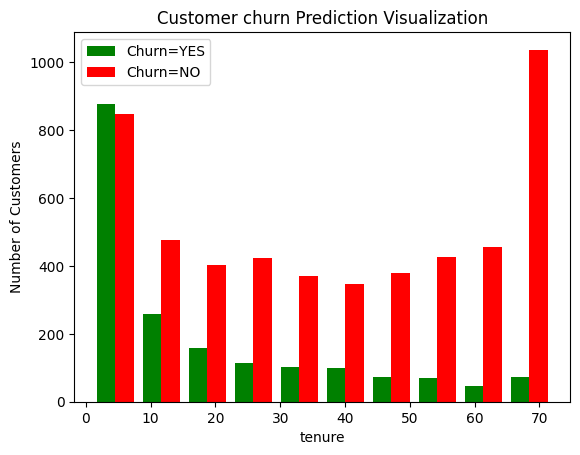

In [30]:
tenure_churn_no=df1[df1.Churn =="No"].tenure
tenure_churn_yes=df1[df1.Churn =="Yes"].tenure
plt.xlabel('tenure')
plt.ylabel("Number of Customers")
plt.title("Customer churn Prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","red"],label=
         ["Churn=YES","Churn=NO"])
plt.legend()


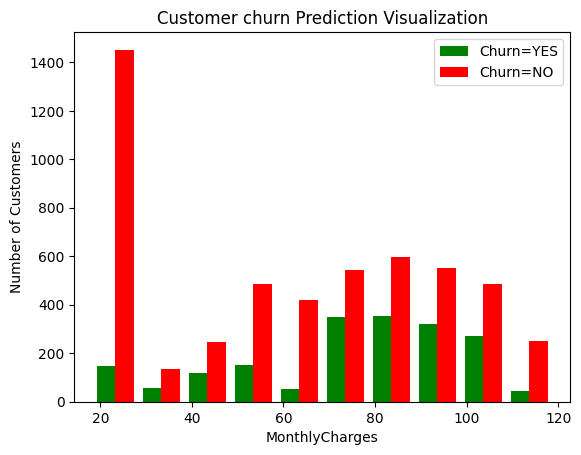

In [31]:
mc_churn_no=df1[df1.Churn =="No"].MonthlyCharges
mc_churn_yes=df1[df1.Churn =="Yes"].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel("Number of Customers")
plt.title("Customer churn Prediction Visualization")
plt.hist([mc_churn_yes,mc_churn_no],color=["green","red"],label=
         ["Churn=YES","Churn=NO"])
plt.legend()


In [40]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=="object":
            print(f"{column}:{df[column].unique()}")

In [41]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [42]:
df1.replace("No phone service","No",inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7396\2225408447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [44]:
df1.replace("No internet service","No",inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7396\3316021580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)


In [46]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [47]:
yes_no_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity",
               "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

In [48]:
for col in yes_no_columns:
    df1[col].replace({"Yes":1,"No":0},inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7396\2159644582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0},inplace=True)


In [52]:
for column in df1:
      print(f"{column}:{df1[column].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [53]:
df1["gender"].replace({"Female":1,"Male":0},inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7396\3128501519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female":1,"Male":0},inplace=True)


In [54]:
df1["gender"].unique()

array([1, 0], dtype=int64)

In [58]:
df2=pd.get_dummies(df1,columns=["InternetService","Contract","PaymentMethod"])

In [59]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [60]:
df2.shape

(7032, 27)

In [64]:
df2.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5710,1,0,1,0,70,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
6637,0,0,1,0,69,1,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1953,0,0,0,1,1,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5099,1,0,0,1,11,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3947,1,0,0,0,5,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2440,0,0,1,1,32,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [67]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [69]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.421928,0.493902,0.00,0.0000,0.000,1.0000,1.00
OnlineSecurity,7032.0,0.286547,0.452180,0.00,0.0000,0.000,1.0000,1.00
OnlineBackup,7032.0,0.344852,0.475354,0.00,0.0000,0.000,1.0000,1.00
DeviceProtection,7032.0,0.343857,0.475028,0.00,0.0000,0.000,1.0000,1.00


In [71]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [72]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.495307,0.500014,0.0,0.000000,0.000000,1.000000,1.0
SeniorCitizen,7032.0,0.162400,0.368844,0.0,0.000000,0.000000,0.000000,1.0
Partner,7032.0,0.482509,0.499729,0.0,0.000000,0.000000,1.000000,1.0
Dependents,7032.0,0.298493,0.457629,0.0,0.000000,0.000000,1.000000,1.0
tenure,7032.0,0.442560,0.345708,0.0,0.112676,0.394366,0.760563,1.0
PhoneService,7032.0,0.903299,0.295571,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,7032.0,0.421928,0.493902,0.0,0.000000,0.000000,1.000000,1.0
OnlineSecurity,7032.0,0.286547,0.452180,0.0,0.000000,0.000000,1.000000,1.0
OnlineBackup,7032.0,0.344852,0.475354,0.0,0.000000,0.000000,1.000000,1.0
DeviceProtection,7032.0,0.343857,0.475028,0.0,0.000000,0.000000,1.000000,1.0


<h1>Spliting the data<h1>

In [74]:
X=df2.drop("Churn",axis="columns")
y=df2["Churn"]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [93]:
y_train

5664    1
101     0
2621    0
392     0
1327    1
       ..
3051    0
1730    1
4086    0
2259    0
2920    0
Name: Churn, Length: 5625, dtype: int64

In [125]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
   
    keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5717 - accuracy: 0.7108
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7463
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7604
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.7746
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7826
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7844
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7876
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.7888
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.7922
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4257 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8087
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8092
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8108
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8085
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8087
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8091
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8087
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8082
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8087
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 

In [126]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7903


[0.4395778477191925, 0.7903340458869934]

In [127]:
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.19742702],
       [0.42477438],
       [0.01204794],
       [0.7311241 ],
       [0.5901536 ]], dtype=float32)

In [128]:
y_pred=[]
for elements in yp:
    if elements>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [129]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [130]:
from sklearn.metrics import confusion_matrix,classification_report

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



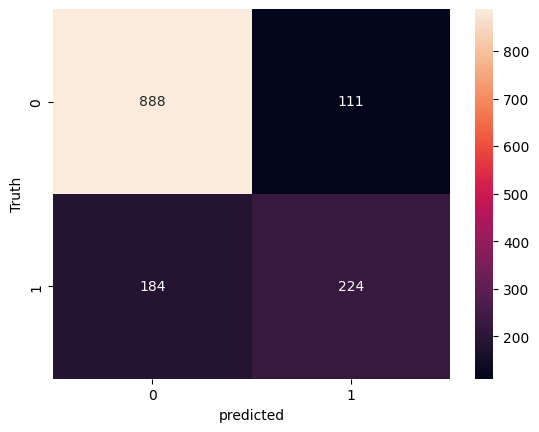

In [132]:
cm=tf.math.confusion_matrix(labels=y_test,predictions= y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

In [136]:
round((888+224)/(888+111+184+224),2) 

0.79